# Visualisation Tutorial for Proximity Evaluation Framework Results

Here we walk through how to load in the pickled output files from the evaluation framework and produce several types of figures to explore and summarise your results.

In the manuscript_reproducibility folder, we have also provided the data processing and figure generation scripts for our manusript, along with the results files to produce these.

See our (under submission) publication for additional details and findings of our own analysis.

In [8]:
import sys
import os
from sciviso import *
from scproximite import * 

# Load Data

We begin by loading our results from the pickled dictionary objects produced in the framework tutorial. Here, we will explore both data structure and dimensionality. For each structure in discrete-abundant, discrete-rare, continuous-abundant and continuous-rare structure, we read in a version with all genes (high-dimensional), 2000 highly variable genes (2000HVG) and 500 highly variable genes (HD500).

The discrete data was produced by Wegmann et al. (2019) and is available in Zenodo, at https://zenodo.org/record/3238275. Subset 1 and 2 were produced by following the instructions included with the raw data in the Zenodo link. Additional preparation by us is included in 'Real_scRNAseq_Processing.ipynb'.

The continuous data was produced by Popescu et al. (2019) and is available at https://developmentcellatlas.ncl.ac.uk/datasets/hca_liver/data_share/. The code for producing subset 1 and subset 2 from the original dataset is provided in in 'Real_scRNAseq_Processing.ipynb'.

In [9]:
data_dir = '../data/vis/'
all_datasets = ['Discrete_Abundant','Discrete_Abundant_HVG2000','Discrete_Abundant_HVG500',
                'Discrete_Rare','Discrete_Rare_HVG2000','Discrete_Rare_HVG500',
                'Continuous_Abundant','Continuous_Abundant_HVG2000','Continuous_Abundant_HVG500',
                'Continuous_Rare','Continuous_Rare_HVG2000','Continuous_Rare_HVG500']
datasets = dict.fromkeys(all_datasets, None)

Here you can decide which proximity metrics (metrics), neighbourhood sizes (k_vals) and evaluation scores (eval_metrics)
you want to load in for the visualisations. We have opted to only load in the 17 proximity metrics we reviewed in our study, as well as all neighbourhood sizes and evaluation measures computed.

In [10]:
# Define the metrics, k values and evaluation scores you want to load in, or leave blank to include all:
all_metrics = ['euclidean', 'cityblock', 'correlation', 'spearman', 'cosine', 'braycurtis', 'canberra',
          'hamming', 'jaccard', 'kulsinski', 'yule', 'OT', 'phi_s', 'weighted_rank',
          'kendall', 'zi_kendall','chebyshev']

for dataset in datasets.keys():
    datasets[dataset] = load_pickle(dataset, data_dir, mode='mean', metrics= all_metrics,eval_metrics=None,k_vals=None)

# Set Up

### Visualisation Dataframe & Aesthetics

Here we set some of the parameters for figure aesthetics:

In [20]:
#Set directory to save figures to:
figure_dir = ''
# Set to true if you want to save figures out:
save = False
plt.rcParams['figure.dpi'] = 300
base_scale = 'Blues'

#Set up aesthetics for heatmap:
heatmap_config = {
    'title_font_size': 15,
    'palette': ['orchid', 'navy', 'red','green', 'grey', 'teal', 'orange'],
    'label_font_size': 12,
    'axis_font_size': 10,
    'add_dots': True,
    's': 60,
    'figsize': (15, 10),
}

#Seaborn theme and context:
sns.set_context("notebook")
sns.set_style("darkgrid",{'ytick.left': True,'xtick.bottom': True, 'axes.linewidth':1, 'axes.edgecolor':'black'})

# General Colour & marker pallette
colour_palette = ['#1b9e77', '#d95f02','#7570b3','#e7298a']#,'#66a61e','#e6ab02','#0a481e','#666666','#e41a1c','#7b4173', '#d6616b', '#393b79', '#b5cf6b', '#17becf', '#8c564b', '#f504c9', '#ffed6f']

#Colour dictionary for Metrics:
colour_dict = {'euclidean':'#393b79', 'cityblock':'#6b6ecf', 'correlation':'#637939', 'spearman':'#b5cf6b', 'cosine':'#e6550d',
          'braycurtis':'#843c39', 'hamming':'#d6616b', 'jaccard':'#31a354', 'kulsinski':'#7b4173', 'yule':'#ce6dbd',
          'OT':'#e7ba52', 'phi_s':'#3182bd','weighted_rank':'#e7969c', 'kendall':'#fdae6b', 'zi_kendall':'#9467bd',
          'canberra':'#8c6d31', 'chebyshev':'#636363'}

Here we will define some particular subsets of datasets and neighbourhood sizes we are interested in producing figures with. We have seperated out the high-dimensional datasets to have an unbiased look at how structure influences performance of the proximity metrics, and we have only included k=3,10,30,50 as these are a more standard range of neighbourhood sizes to evaluate the mean performance of proximity metrics across. We also produced another dataframe with this subset of k_values, but all datasets included, and a dataframe with all datasets and k_values.

In [21]:
# Select the k values you want to visualise
all_k_vals = ["3K_stats", '10K_stats', "30K_stats", "50K_stats", "100K_stats"]
sub_k_vals = ["3K_stats", '10K_stats', "30K_stats", "50K_stats"]

# Select the evlauation metrics you want to visualise
eval_metrics = ['ARI', 'PSI']

# Select the dataset subsets you want to visualise, you can make multiple dataframes to visualise different combinations:
all_datasets = ['Discrete_Abundant','Discrete_Abundant_HVG2000','Discrete_Abundant_HVG500',
                'Discrete_Rare','Discrete_Rare_HVG2000','Discrete_Rare_HVG500',
                'Continuous_Abundant','Continuous_Abundant_HVG2000','Continuous_Abundant_HVG500',
                'Continuous_Rare','Continuous_Rare_HVG2000','Continuous_Rare_HVG500']

HD_datasets=['Discrete_Abundant','Discrete_Rare','Continuous_Abundant','Continuous_Rare']

In [22]:
#Create visualisation dataframes:
full_df = vis_dataframe(datasets=all_datasets, datasets_dict=datasets, metrics=all_metrics, k_vals=all_k_vals, eval_metrics=eval_metrics)

subset_k_df = vis_dataframe(datasets=all_datasets, datasets_dict=datasets, metrics=all_metrics, k_vals=sub_k_vals, eval_metrics=eval_metrics)

HD_df = vis_dataframe(datasets=HD_datasets, datasets_dict=datasets, metrics=all_metrics, k_vals=sub_k_vals, eval_metrics=eval_metrics)

# Broad Structural Comparisons

Here we recreate figure 4 from our manuscript, showing the mean clustering performance from neighbourhood sizes of k = (3,10,30,50), with error bars depicting the standard deviation. We produce the figure with both PSI and ARI to compare how these different validation measures score the clustering.

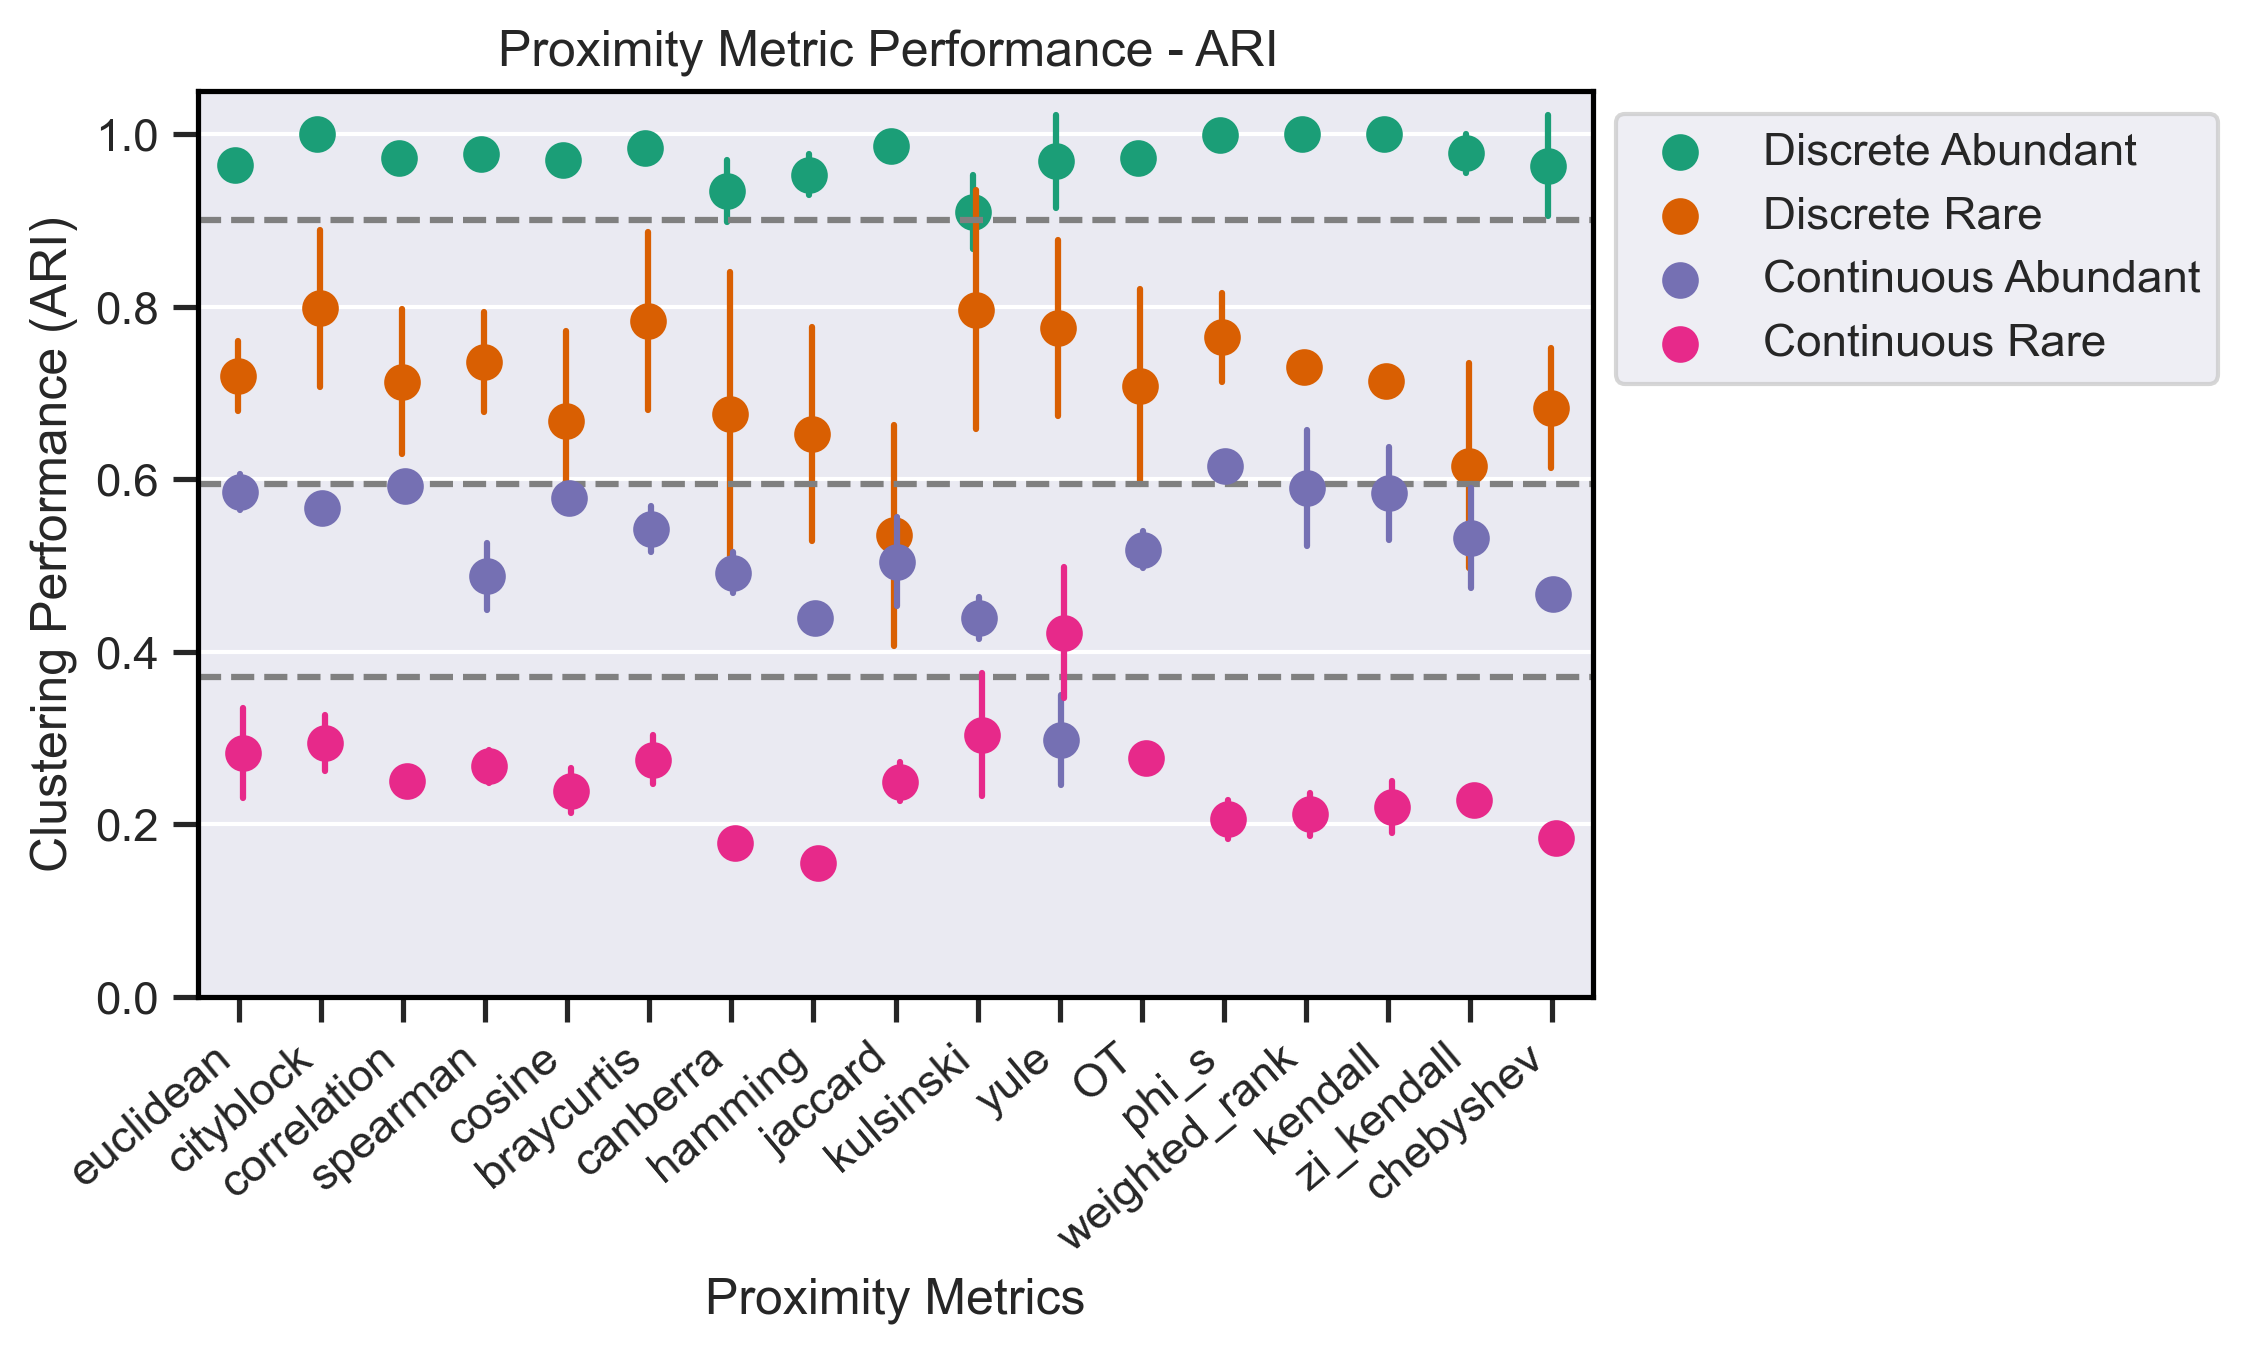

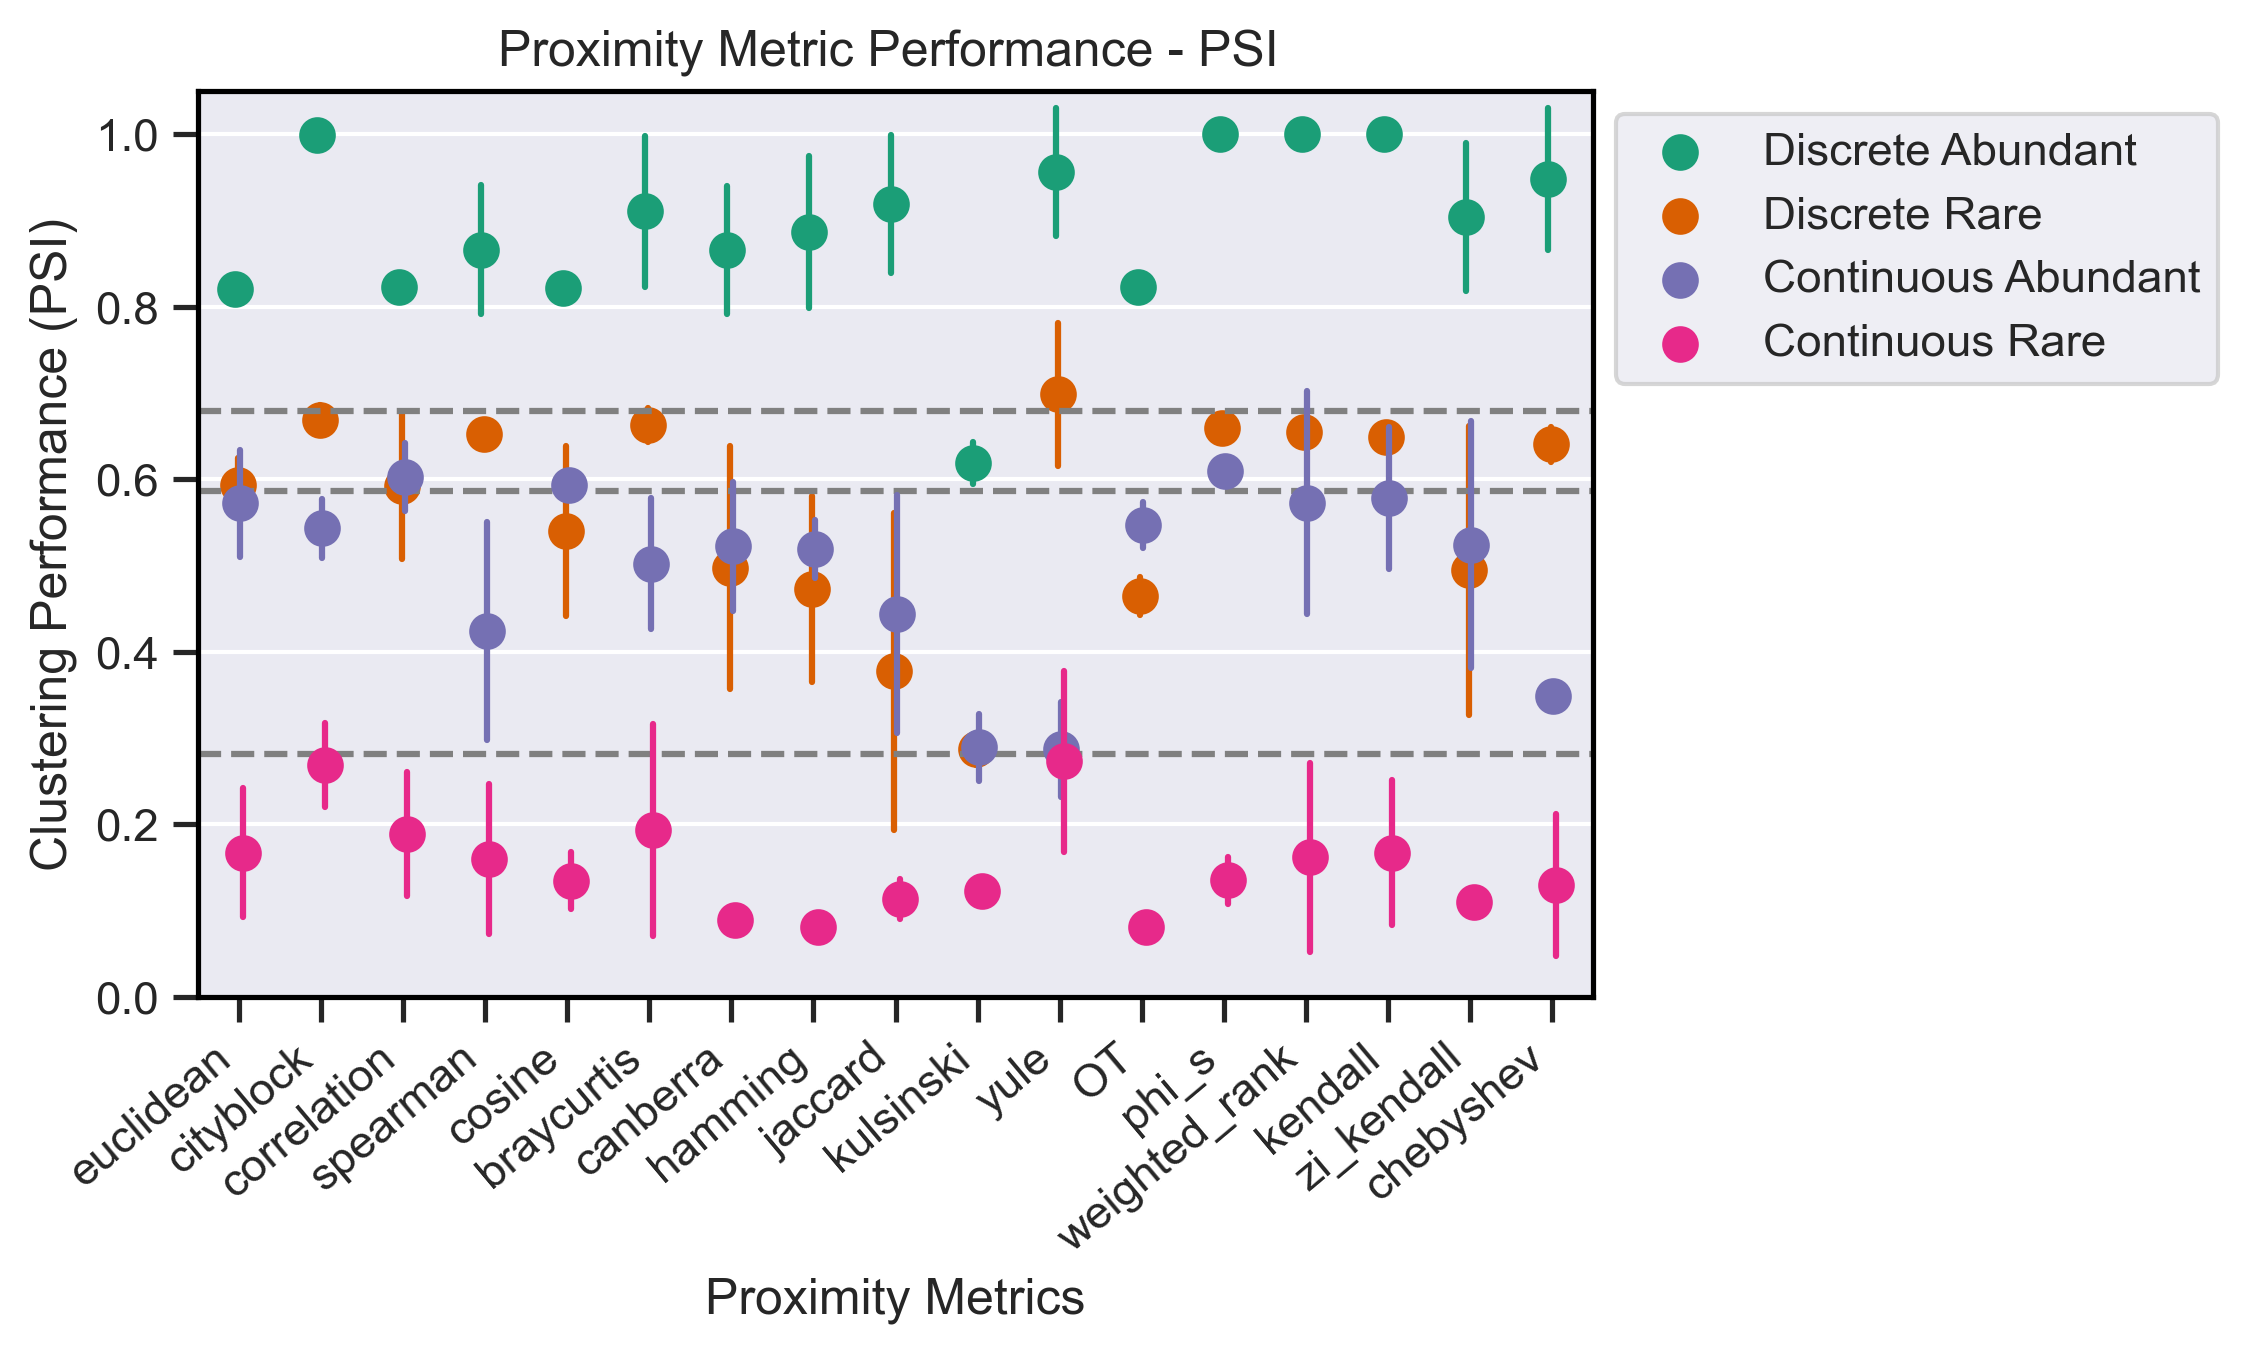

In [23]:
order = all_metrics
hue_order = ['Discrete Abundant', 'Discrete Rare', 'Continuous Abundant','Continuous Rare']

for score in eval_metrics:
    data = HD_df[HD_df['Evaluation_Metric']==score]
    ax = sns.pointplot(data=data,
                       x="Metric",
                       y="Performance",
                       hue="Condition",
                       join=False,
                       order = order,
                       hue_order=hue_order,
                       height=1.5,
                       aspect = 2.5,
                       dodge=True,
                       palette=colour_palette,
                       scale = 1,
                       errwidth = 1.5,
                       ci="sd")

    ax.legend(bbox_to_anchor=(1,1), loc='upper left', borderaxespad=0.5)
    ax.set(xlabel='Proximity Metrics', ylabel=f'Clustering Performance ({score})', title=f'Proximity Metric Performance - {score} ',ylim=(0, 1.05))
    plt.xticks(rotation=40, ha='right')

    #To Include quantile lines:
    desc = data['Performance'].describe()
    quantiles = ['25%','50%','75%']
    for i in range(len(quantiles)):
        ax.axhline(desc[quantiles[i]], color='grey',ls='--')
    if save is True:
        plt.savefig(f'{fig_dir}Structural_Comparison_{score}.png',  bbox_inches = 'tight', dpi=300)
    plt.show()

# Dimensionality Comparison

Here we produce a multi-panel figure depicting how proximity metric performance changed with dimensionality for the four structures. We again use the mean clustering performance from neighbourhood sizes of k = (3,10,30,50), with error bars turned off. We produce the figure with both PSI and ARI to compare how these different validation measures score the clustering.

In [24]:
#Sort dataframe to ensure ordering of legends is correct.
subset_k_df['Condition'] = pd.Categorical(subset_k_df['Condition'], categories=['Discrete Abundant','Discrete Rare', 'Continuous Abundant', 'Continuous Rare'], ordered=True)
subset_k_df = subset_k_df.sort_values(['Metric','Condition']).reset_index(drop=True)

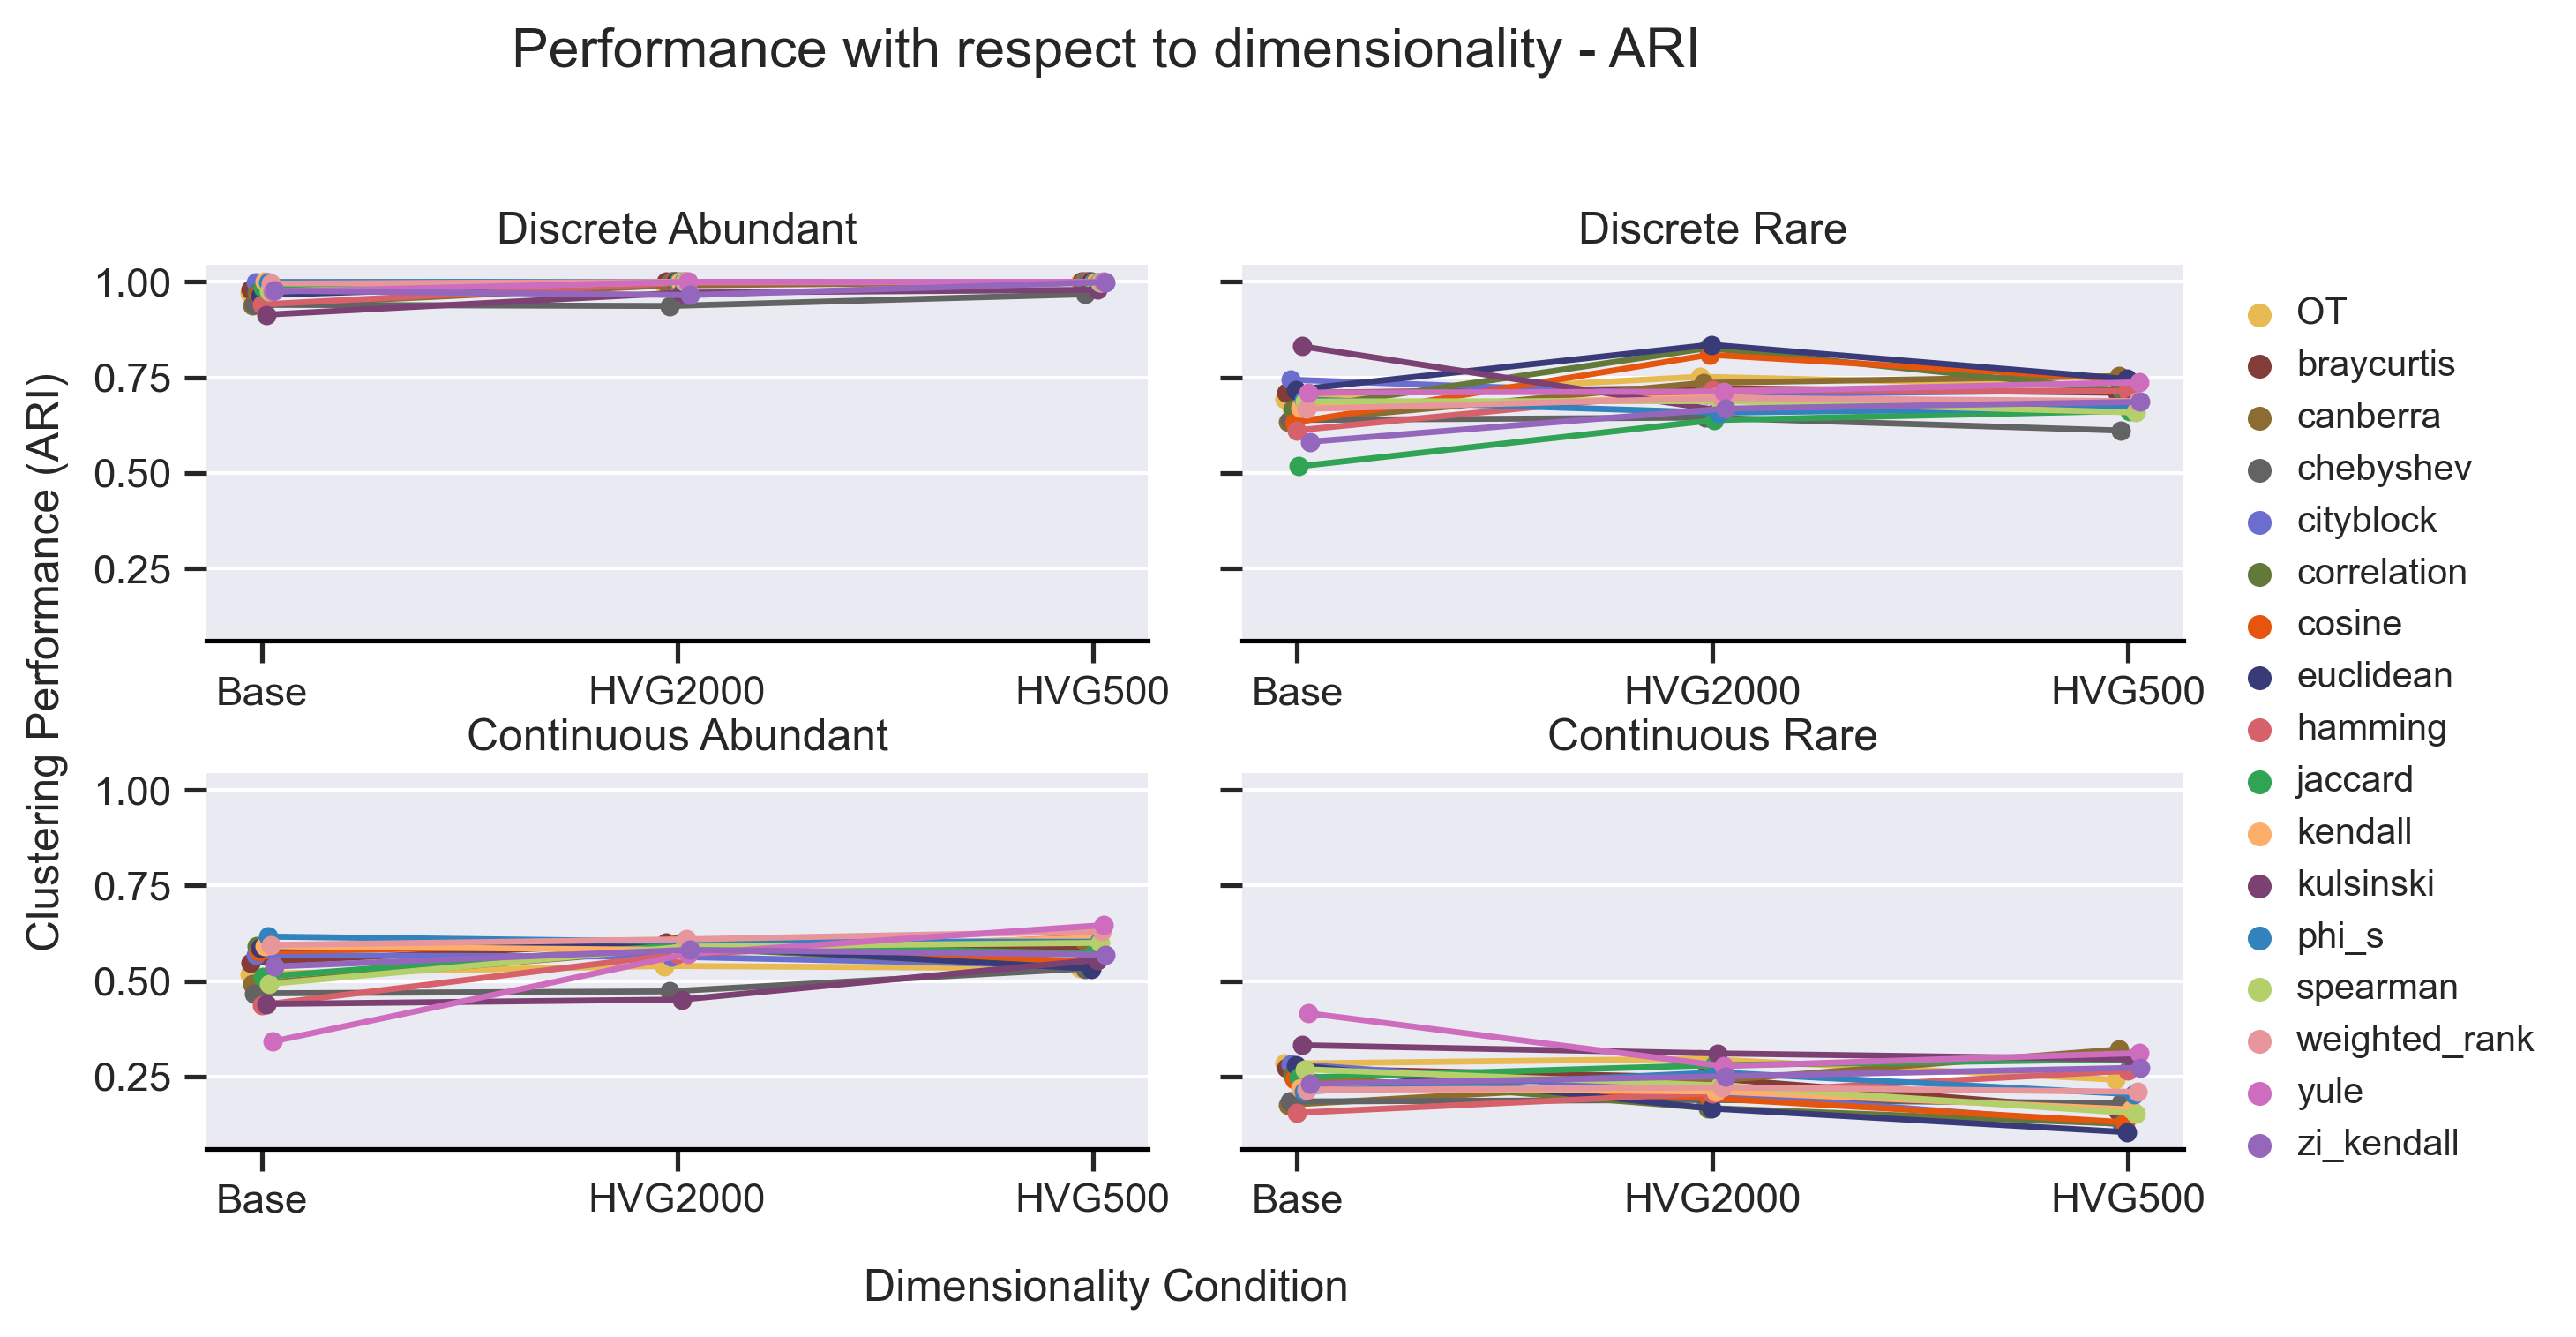

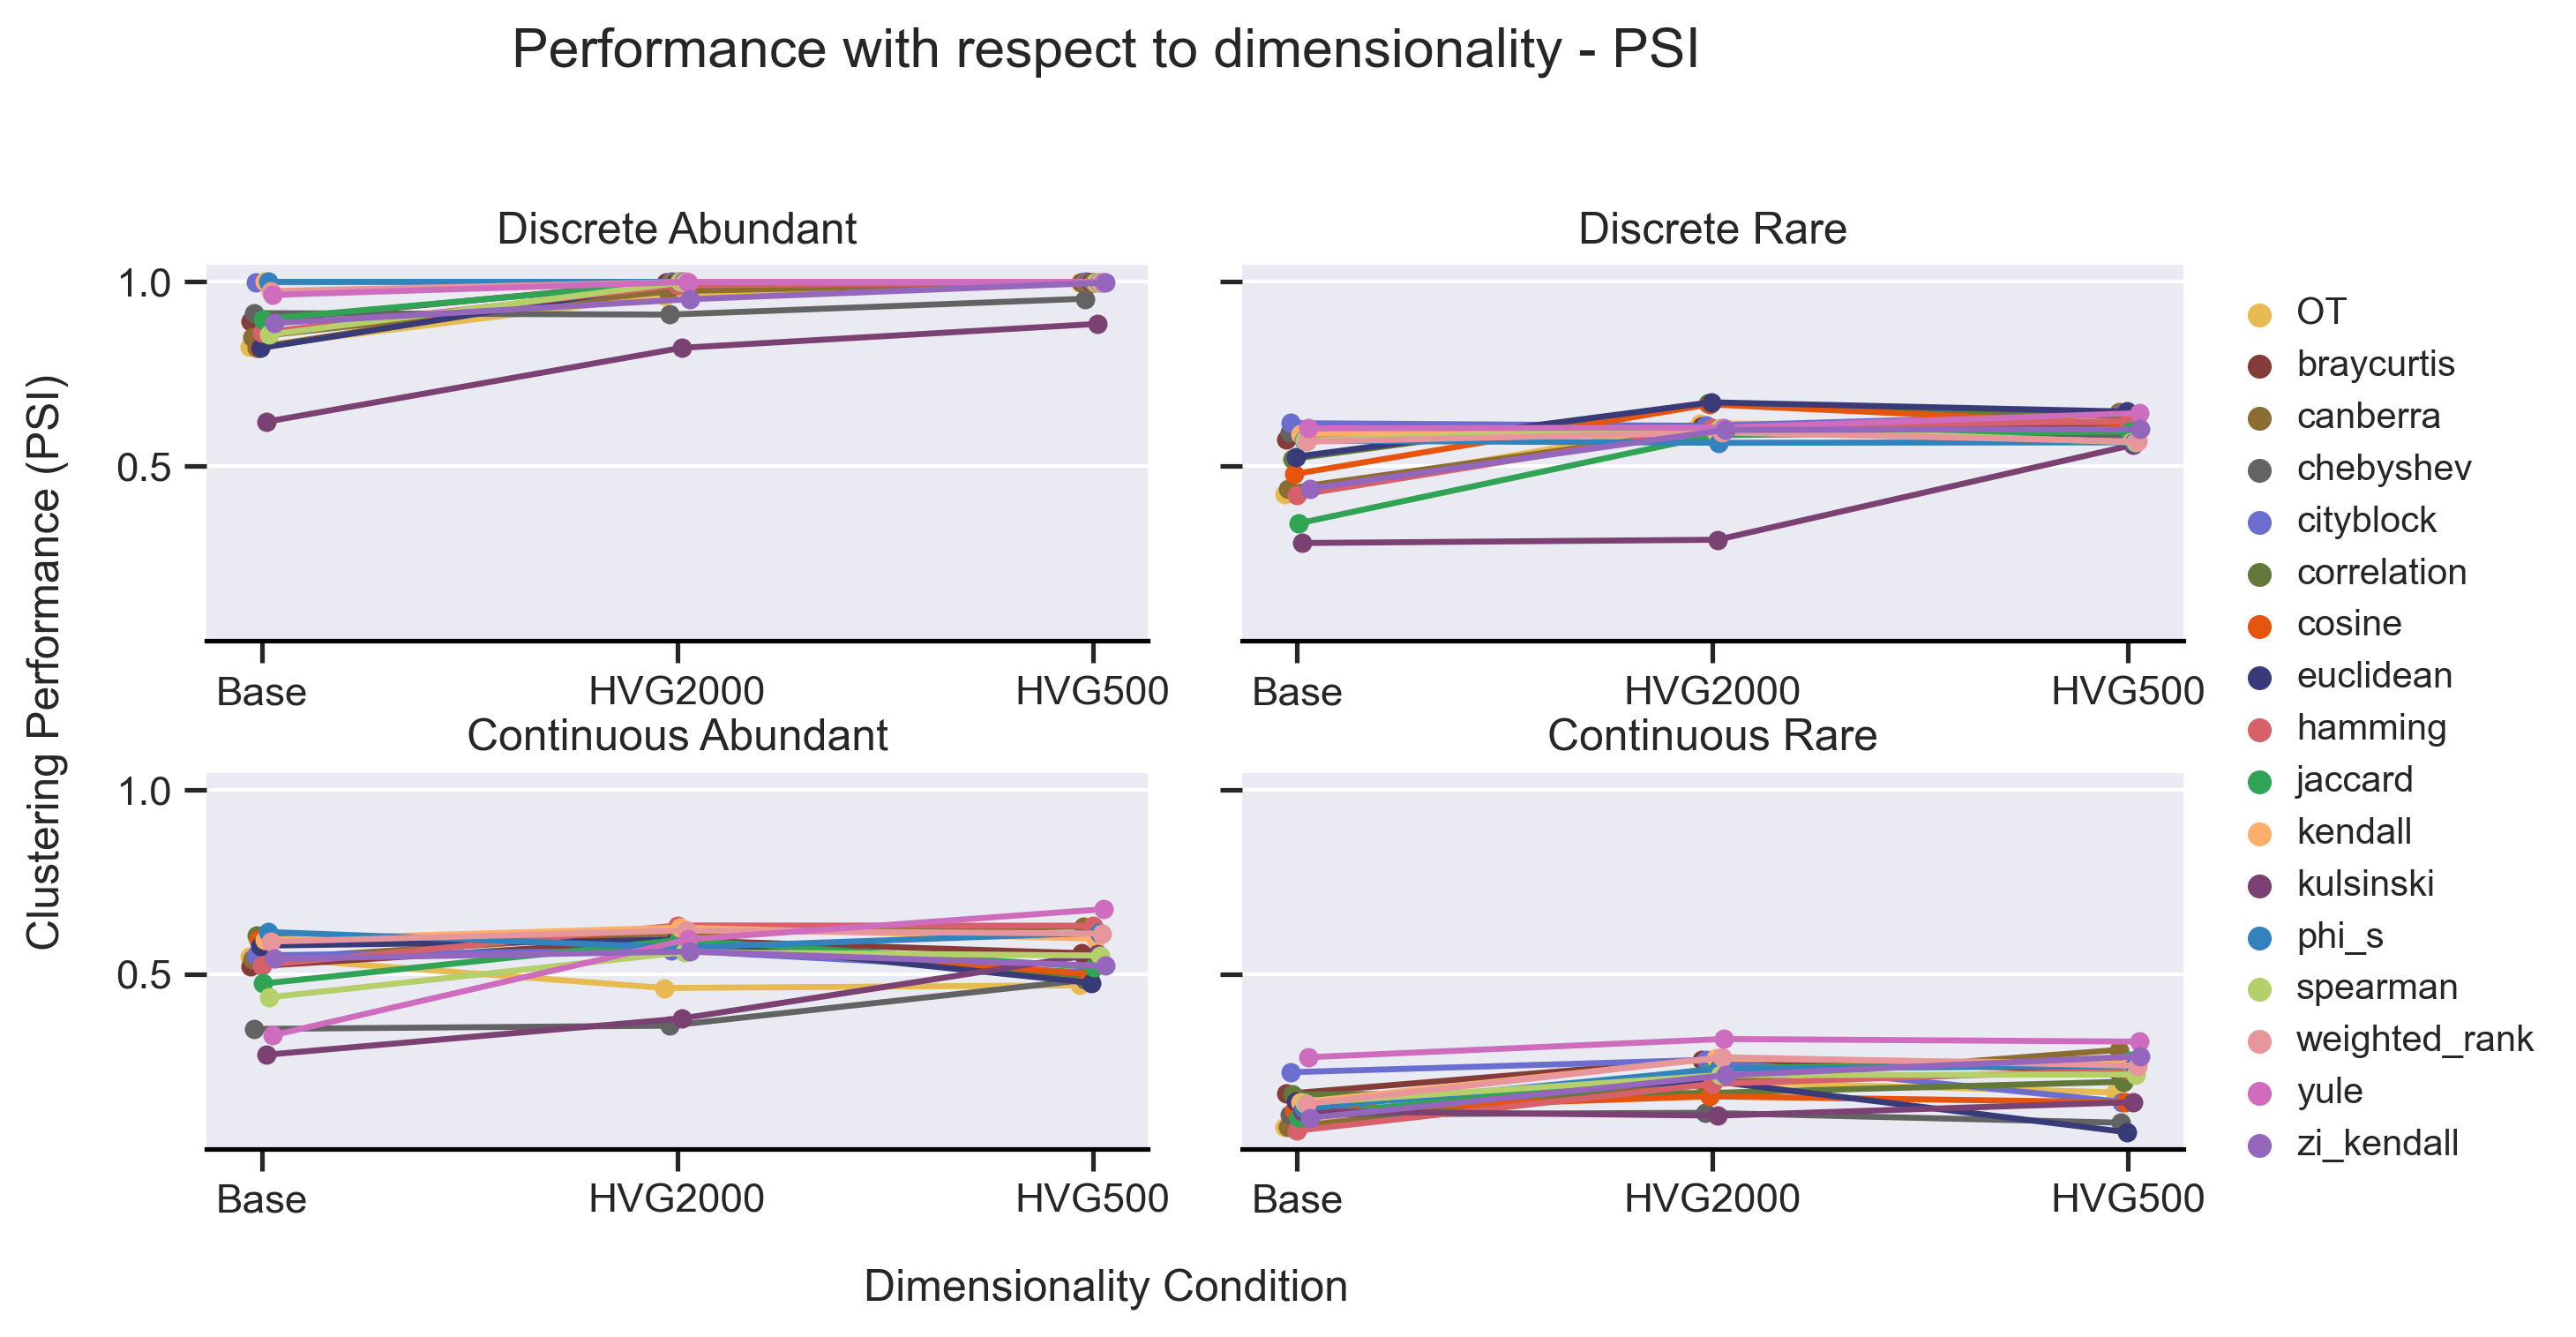

In [25]:
order = ['Base', 'HVG2000', 'HVG500']

for score in eval_metrics:
    data = full_df[full_df['Evaluation_Metric']==score]
    g = sns.catplot(x = 'Property',                  
                    y = 'Performance', 
                    data = data,
                    hue = 'Metric',
                    style='Metric',
                    col = 'Condition',
                    col_order = ['Discrete Abundant','Discrete Rare', 'Continuous Abundant', 'Continuous Rare'],
                    col_wrap = 2,
                    palette = colour_dict,
                    s=10,
                    kind='point',
                    join=True,
                    order = order,
                    dodge=0.06,
                    aspect = 1.7,
                    sharey = True,
                    height = 2.5,
                    scale = 0.6,
                    ci=None,
                    legend=False,
                    legend_out = False).despine(left=True)


    for axes, (i, d) in zip(g.axes.ravel(), data.groupby(['Condition'])):
        handles, labels = axes.get_legend_handles_labels()
        axes.margins(x=0.05)
        axes.xaxis.set_tick_params(which='both', labelbottom=True)
    g.fig.legend(handles = handles, bbox_to_anchor=(1.15,0.8),
                        prop={'size': 10},markerscale=1.3,facecolor='white',handletextpad=0,frameon=False)

    g.fig.subplots_adjust(top = 0.8,left=0.1,wspace=0.1,hspace=0.35)
    g.set_ylabels('')
    g.set_xlabels('')
    g.fig.supxlabel('Dimensionality Condition',fontsize=12)
    g.fig.supylabel(f'Clustering Performance ({score})', fontsize=12)
    g.fig.suptitle(f'Performance with respect to dimensionality - {score}', fontsize=15)
    g.set_titles(template='{col_name}')
    if save is True:
        plt.savefig(f'{fig_dir}DimensionalityPlot_{score}.png',  bbox_inches = 'tight', dpi=300)
    plt.show()

# Neighbourhood Size (k) Comparison

This code produces a multipanel figure to visualise proximity metric performance across neighbourhood size for all datasets, similar to Figure 8 in our manuscript but using the different dimensionality conditions instead. The datasets are filtered to only include metrics which score above the 75% quantile at one or more neighbourhood sizes. We again produce the plot with ARI and PSI to compare.

In [26]:
import warnings
# Ignore setting with copy warning
warnings.simplefilter(action='ignore')


filtered_dataframes = []
for score in eval_metrics:
    data = full_df[full_df['Evaluation_Metric']==score]

    Standard_Dev = data.groupby(['Metric','Dataset'])['Performance'].describe() #Get maximum score achieved by a proximity metric on each dataset, across all k.
    Standard_Dev['ID'] = Standard_Dev.index.map(lambda x: '_'.join([str(i) for i in x]))
    dat = Standard_Dev.reset_index()

    data['ID'] = data['Metric'].str.cat(data[['Dataset']], sep='_')
    result = data.merge(dat.iloc[:,9:], how='inner', on='ID')

    adatas = [result[result['Dataset'].isin([datasets])] for datasets in result['Dataset'].unique()]

    for dat in adatas:
        threshold = dat['max'].quantile([0.75]) #Set threshold as the 75% quantile of maximum scores.
        for index, row in dat.iterrows():
            if row['max'] >= threshold[0.75]:
                dat.loc[index,'pass'] = 'true'
            else:
                dat.loc[index,'pass'] ='false'

    filt = pd.concat(adatas)
    filt = filt[filt['pass'] == 'true']
    filtered_dataframes.append(filt)

Filtered_full_df = pd.concat(filtered_dataframes)
Filtered_full_df['Dataset'] = pd.Categorical(Filtered_full_df['Dataset'], categories=all_datasets, ordered=True)
Filtered_full_df = Filtered_full_df.sort_values(['Metric','Dataset']).reset_index(drop=True)

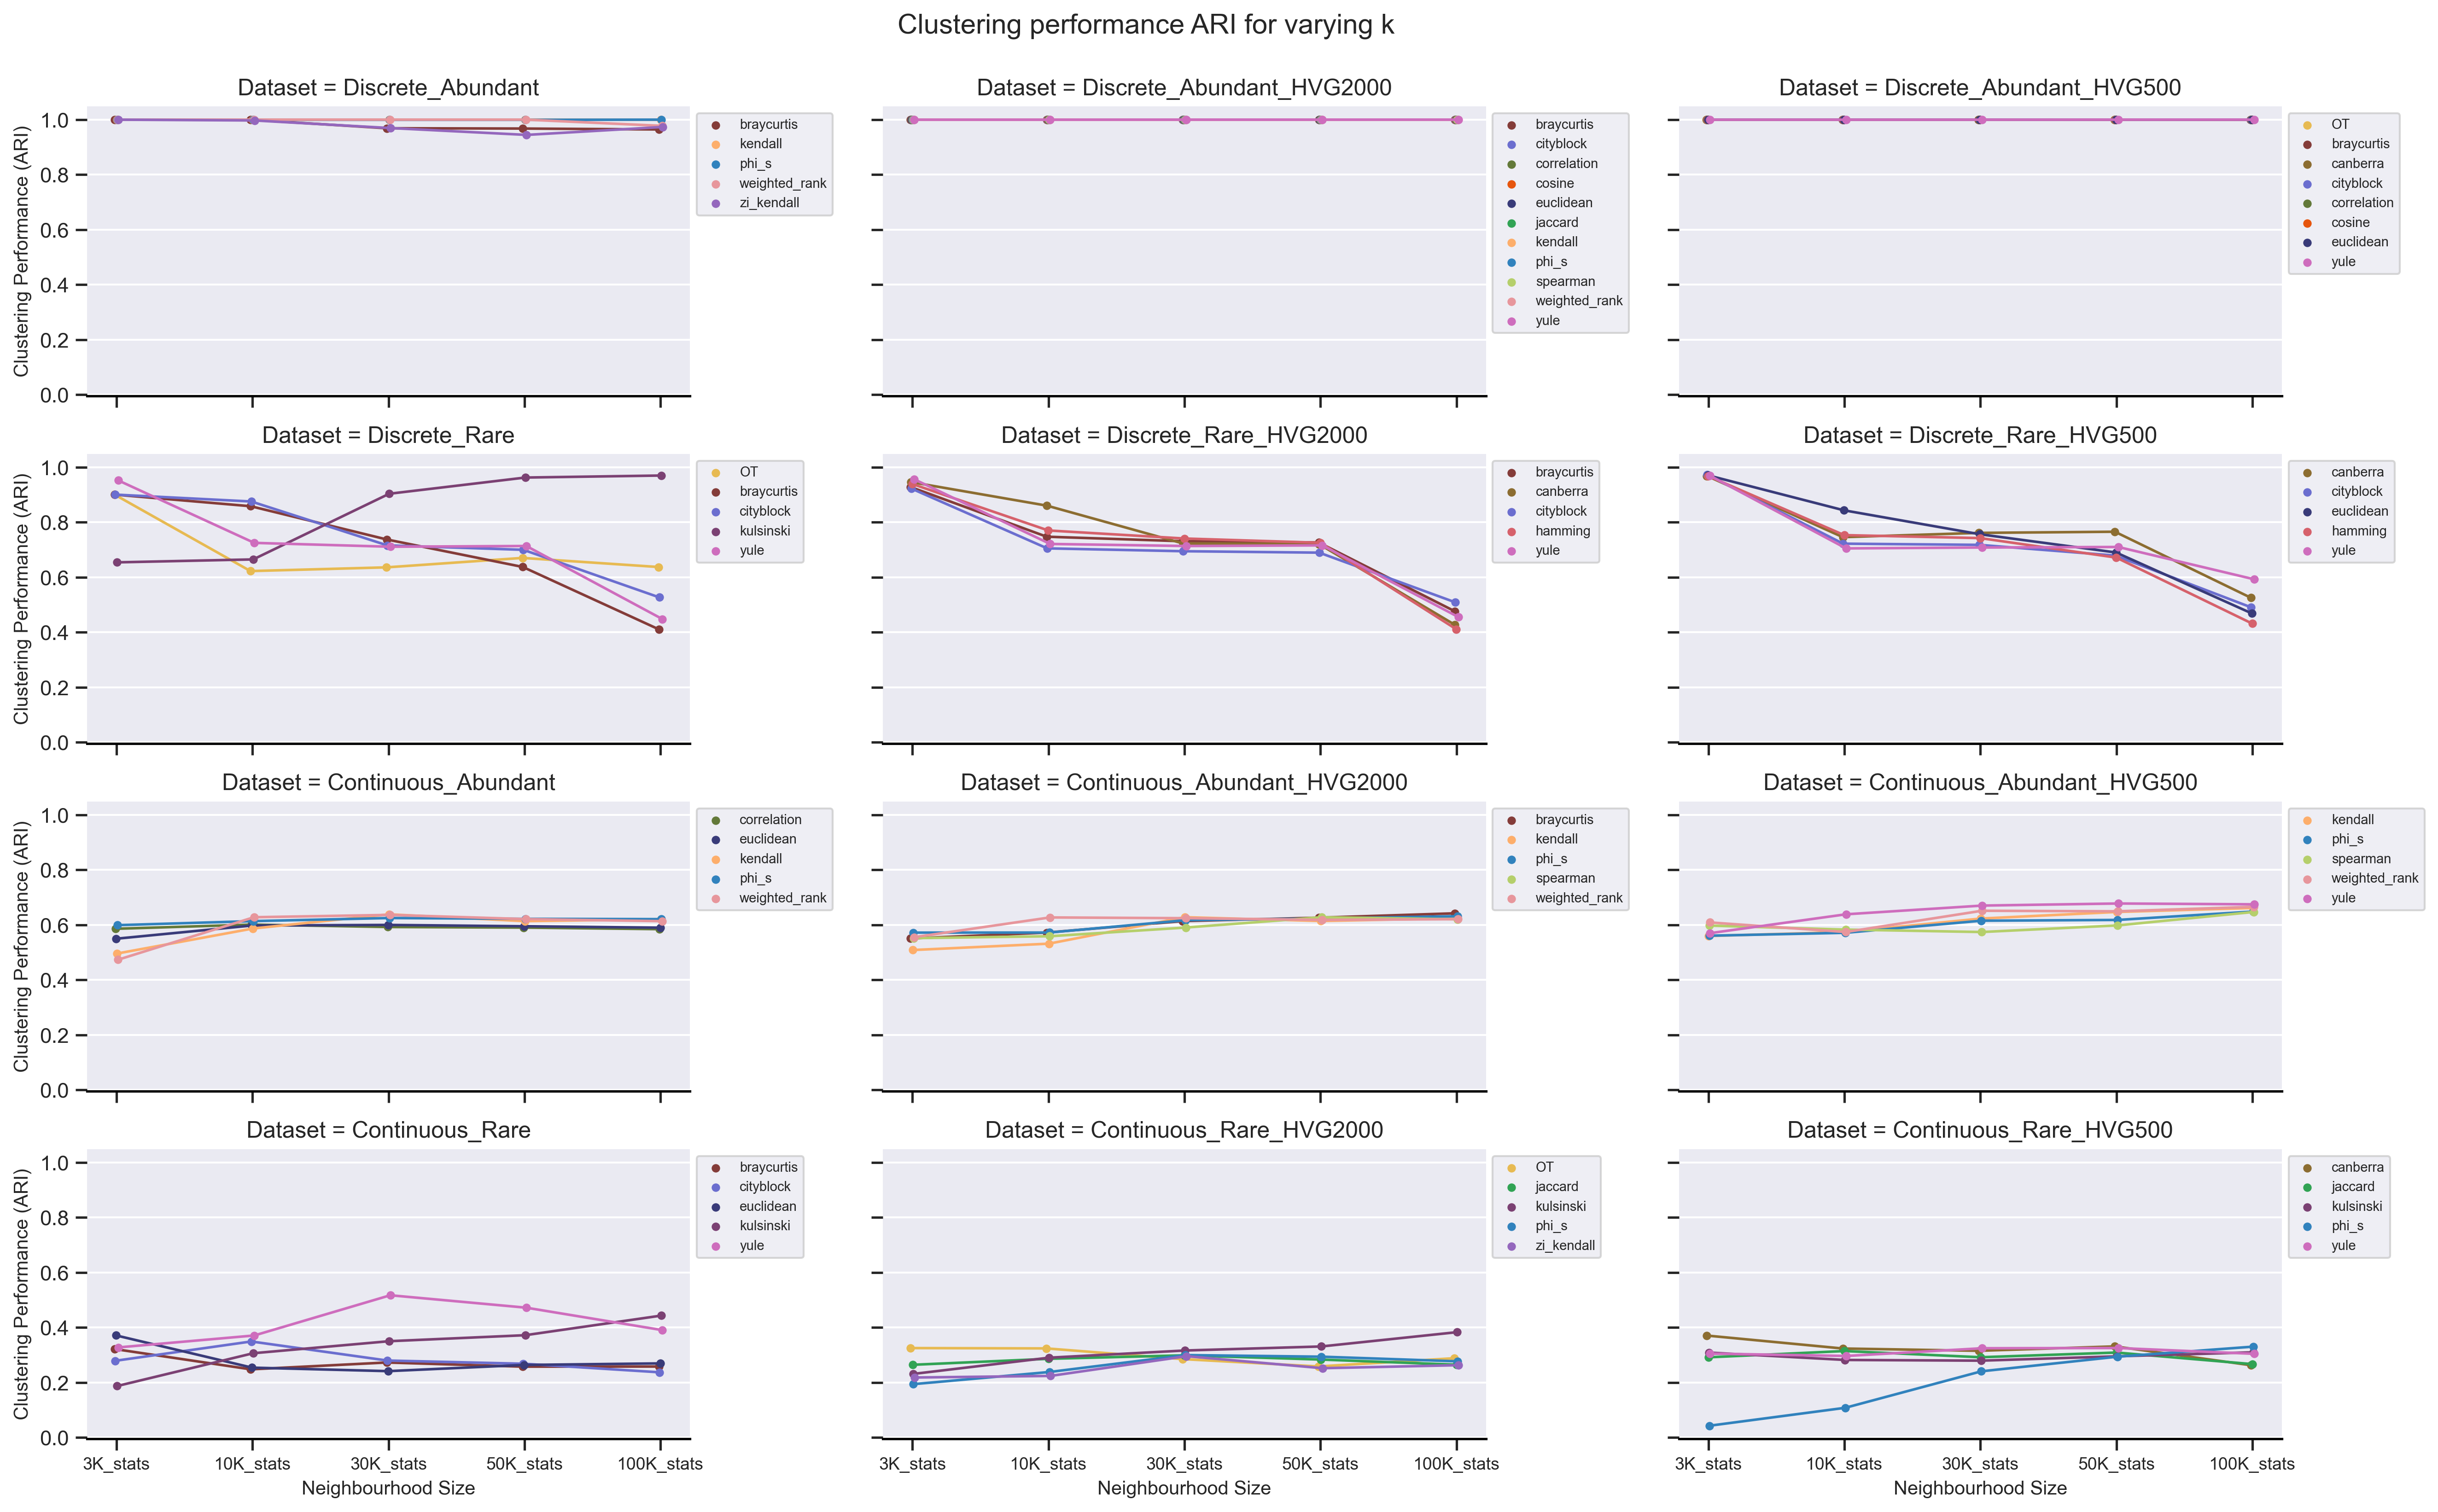

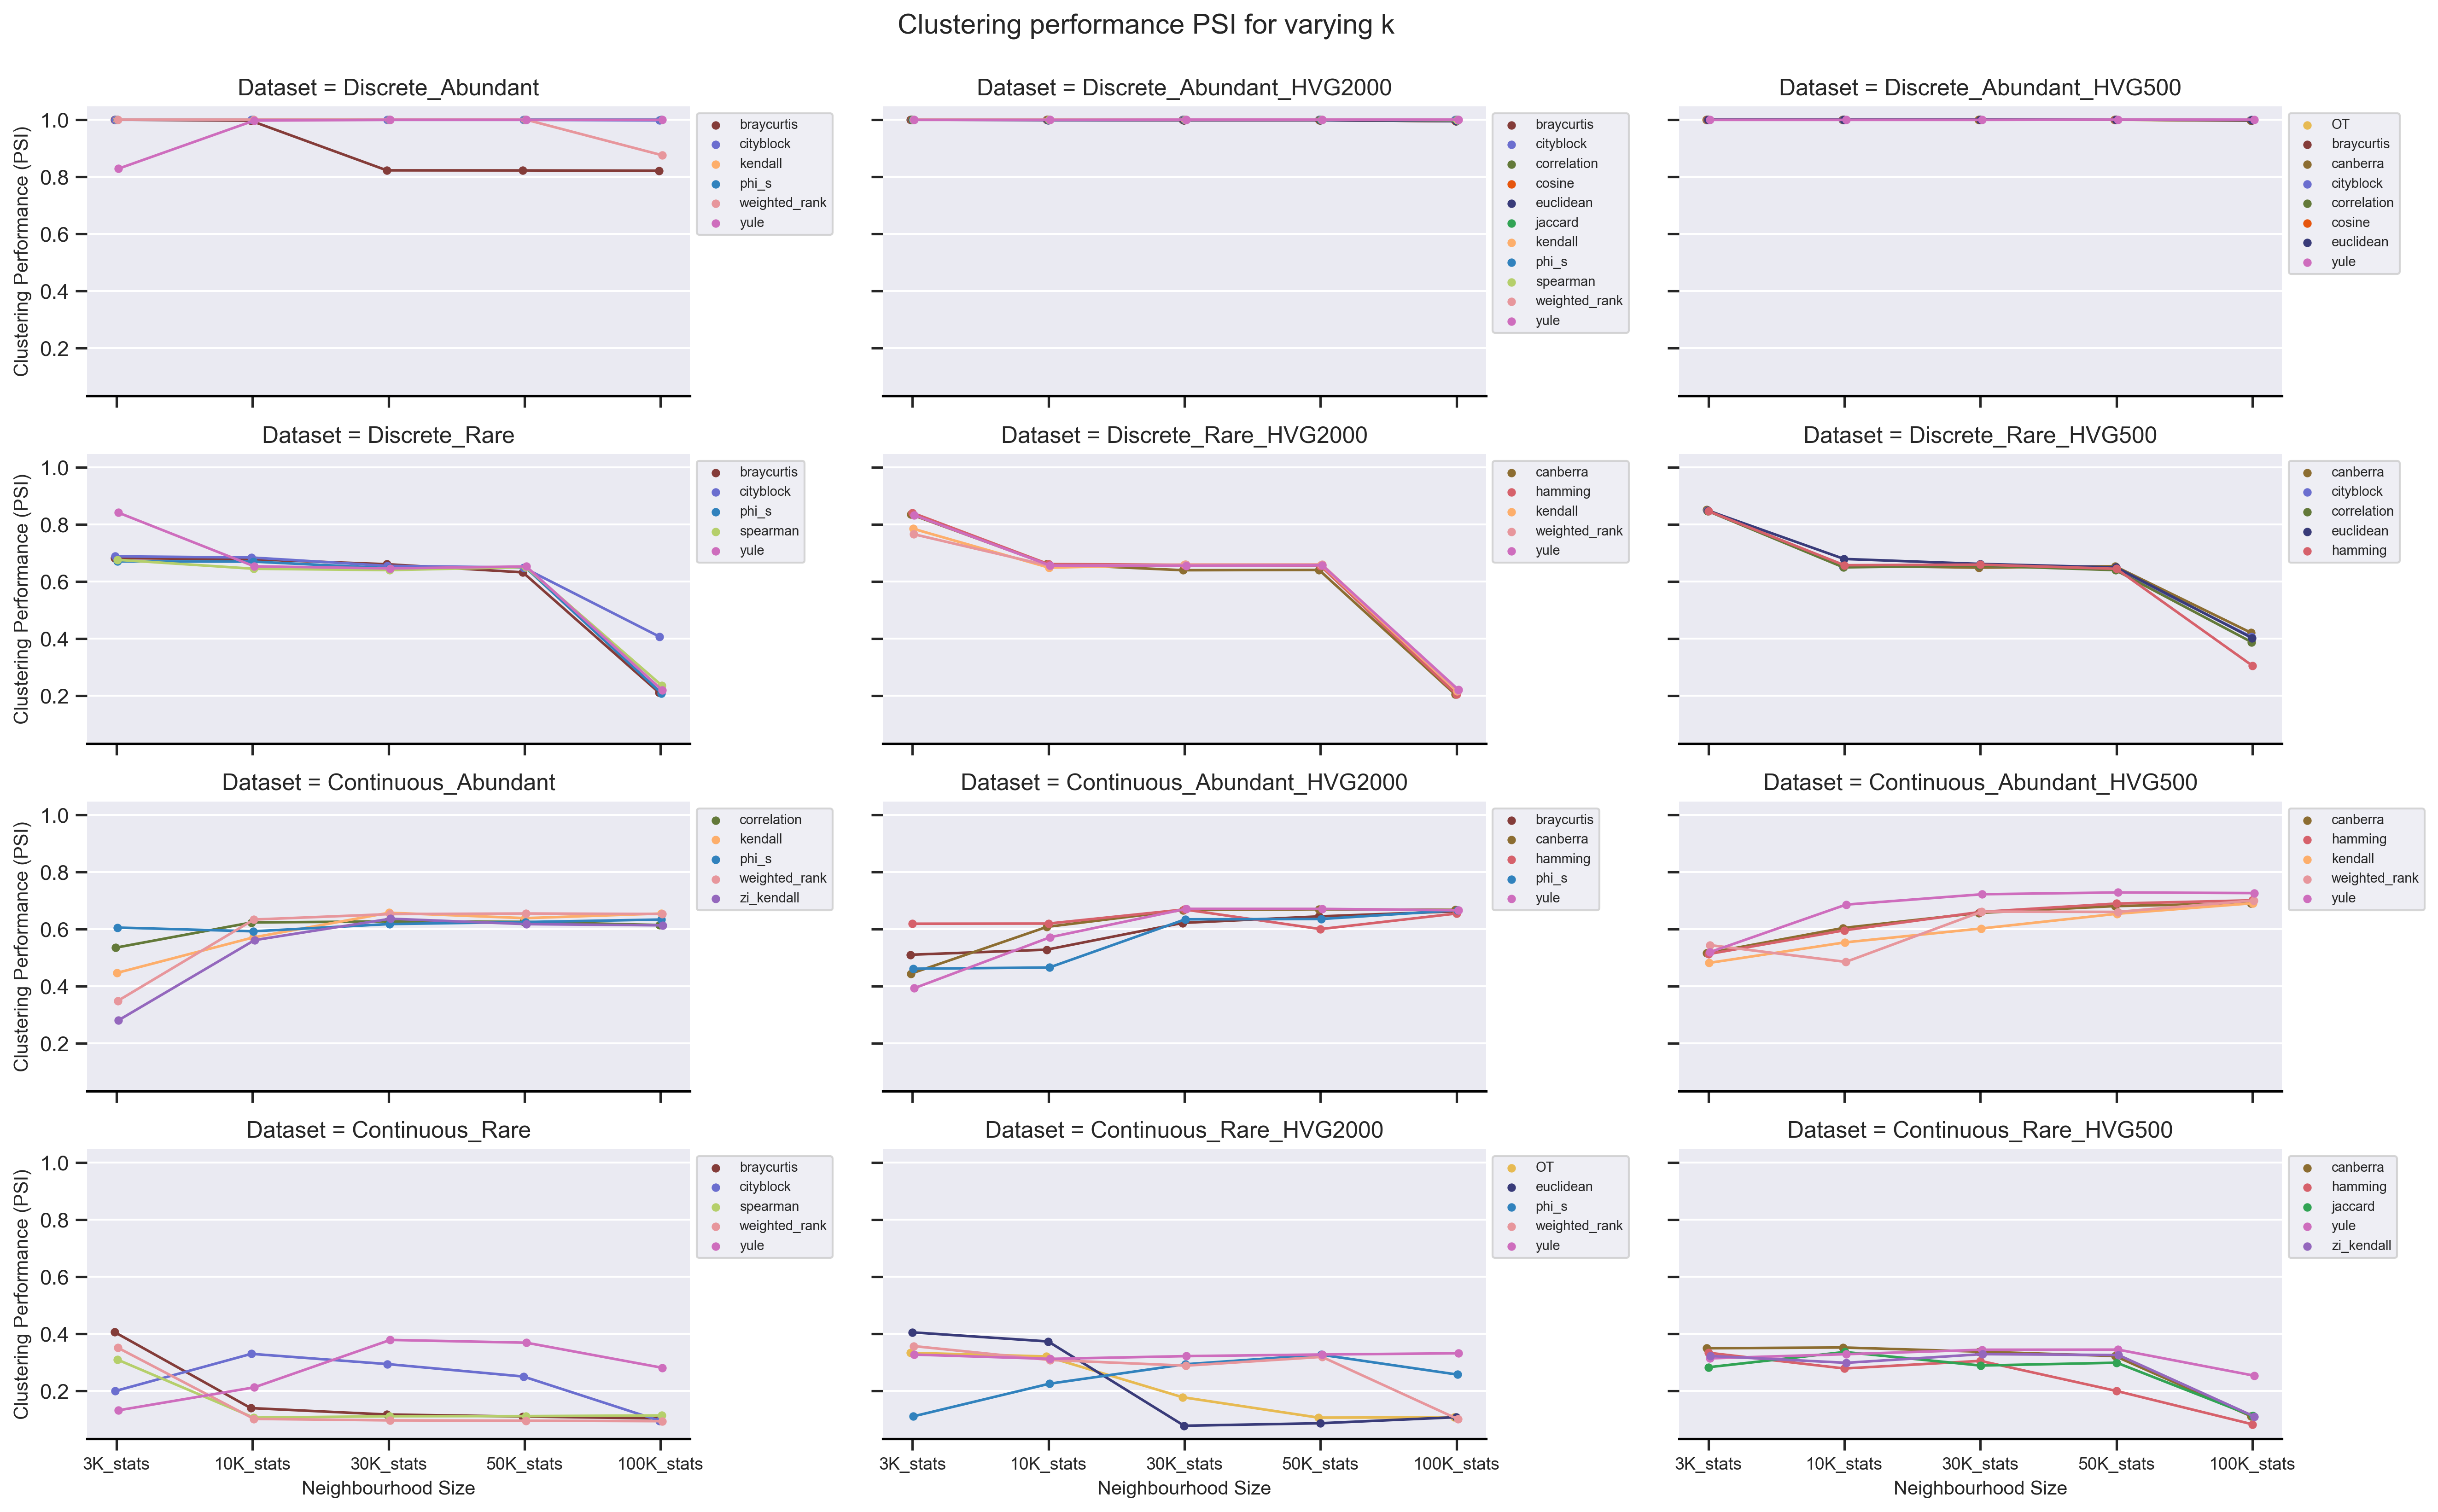

In [27]:
order = ['3K_stats','10K_stats','30K_stats','50K_stats','100K_stats'] #Set order of the neighbourhood sizes for the figure.

for score in eval_metrics:
    data = Filtered_full_df[Filtered_full_df['Evaluation_Metric']==score]
    g = sns.catplot(x = 'k_value',                  
                    y = 'Performance', 
                    data = data,
                    hue = 'Metric',
                    col = 'Dataset',
                    col_order = all_datasets,
                    col_wrap = 3,
                    palette = colour_dict,
                    s=10,
                    kind='point',
                    join=True,
                    order = order,
                    dodge=0.03,
                    aspect = 2.0,
                    sharey = True,
                    height = 2.8,
                    scale = 0.5,
                    legend_out = False).despine(left=True)

#### TO produce individual legends for each subplot: ######
    ser_vals = pd.Series(data['Metric'].sort_values().unique())

    for axes, (i, d) in zip(g.axes.ravel(), data.groupby(['Dataset'])):
        handles, labels = axes.get_legend_handles_labels()

        # SUBSET MASTER SERIES OF serial
        vals = ser_vals[ser_vals.isin(d['Metric'].unique())]    
        idx = vals.index.tolist()
        axes.margins(x=0.05)

        if len(idx) > 0:
            axes.legend(handles = [handles[i] for i in idx],
                        labels = vals.tolist(), loc=2, bbox_to_anchor=(1.0, 1.0), prop={'size': 7})
#############################################################

    g.fig.subplots_adjust(top=0.92, wspace=0.32,hspace=0.2)
    g.set_xlabels('Neighbourhood Size', fontsize=10)
    g.set_xticklabels(fontsize=9)
    g.set_ylabels(f'Clustering Performance ({score})',fontsize=10)
    g.fig.suptitle(f'Clustering performance {score} for varying k')
    g.fig.use_sticky_edges = False
    if save is True:
        plt.savefig(f'{fig_dir}NeighbourhoodSizes_{score}.svg',  bbox_inches = 'tight')
    plt.show()

# Create Heatmaps

Here we recreate the heatmap in Panel B from Figure 10 of our manuscript. Again we show the mean clustering performance from neighbourhood sizes of k = (3,10,30,50), and produce the figure with both PSI and ARI to compare how these different validation measures score the clustering.

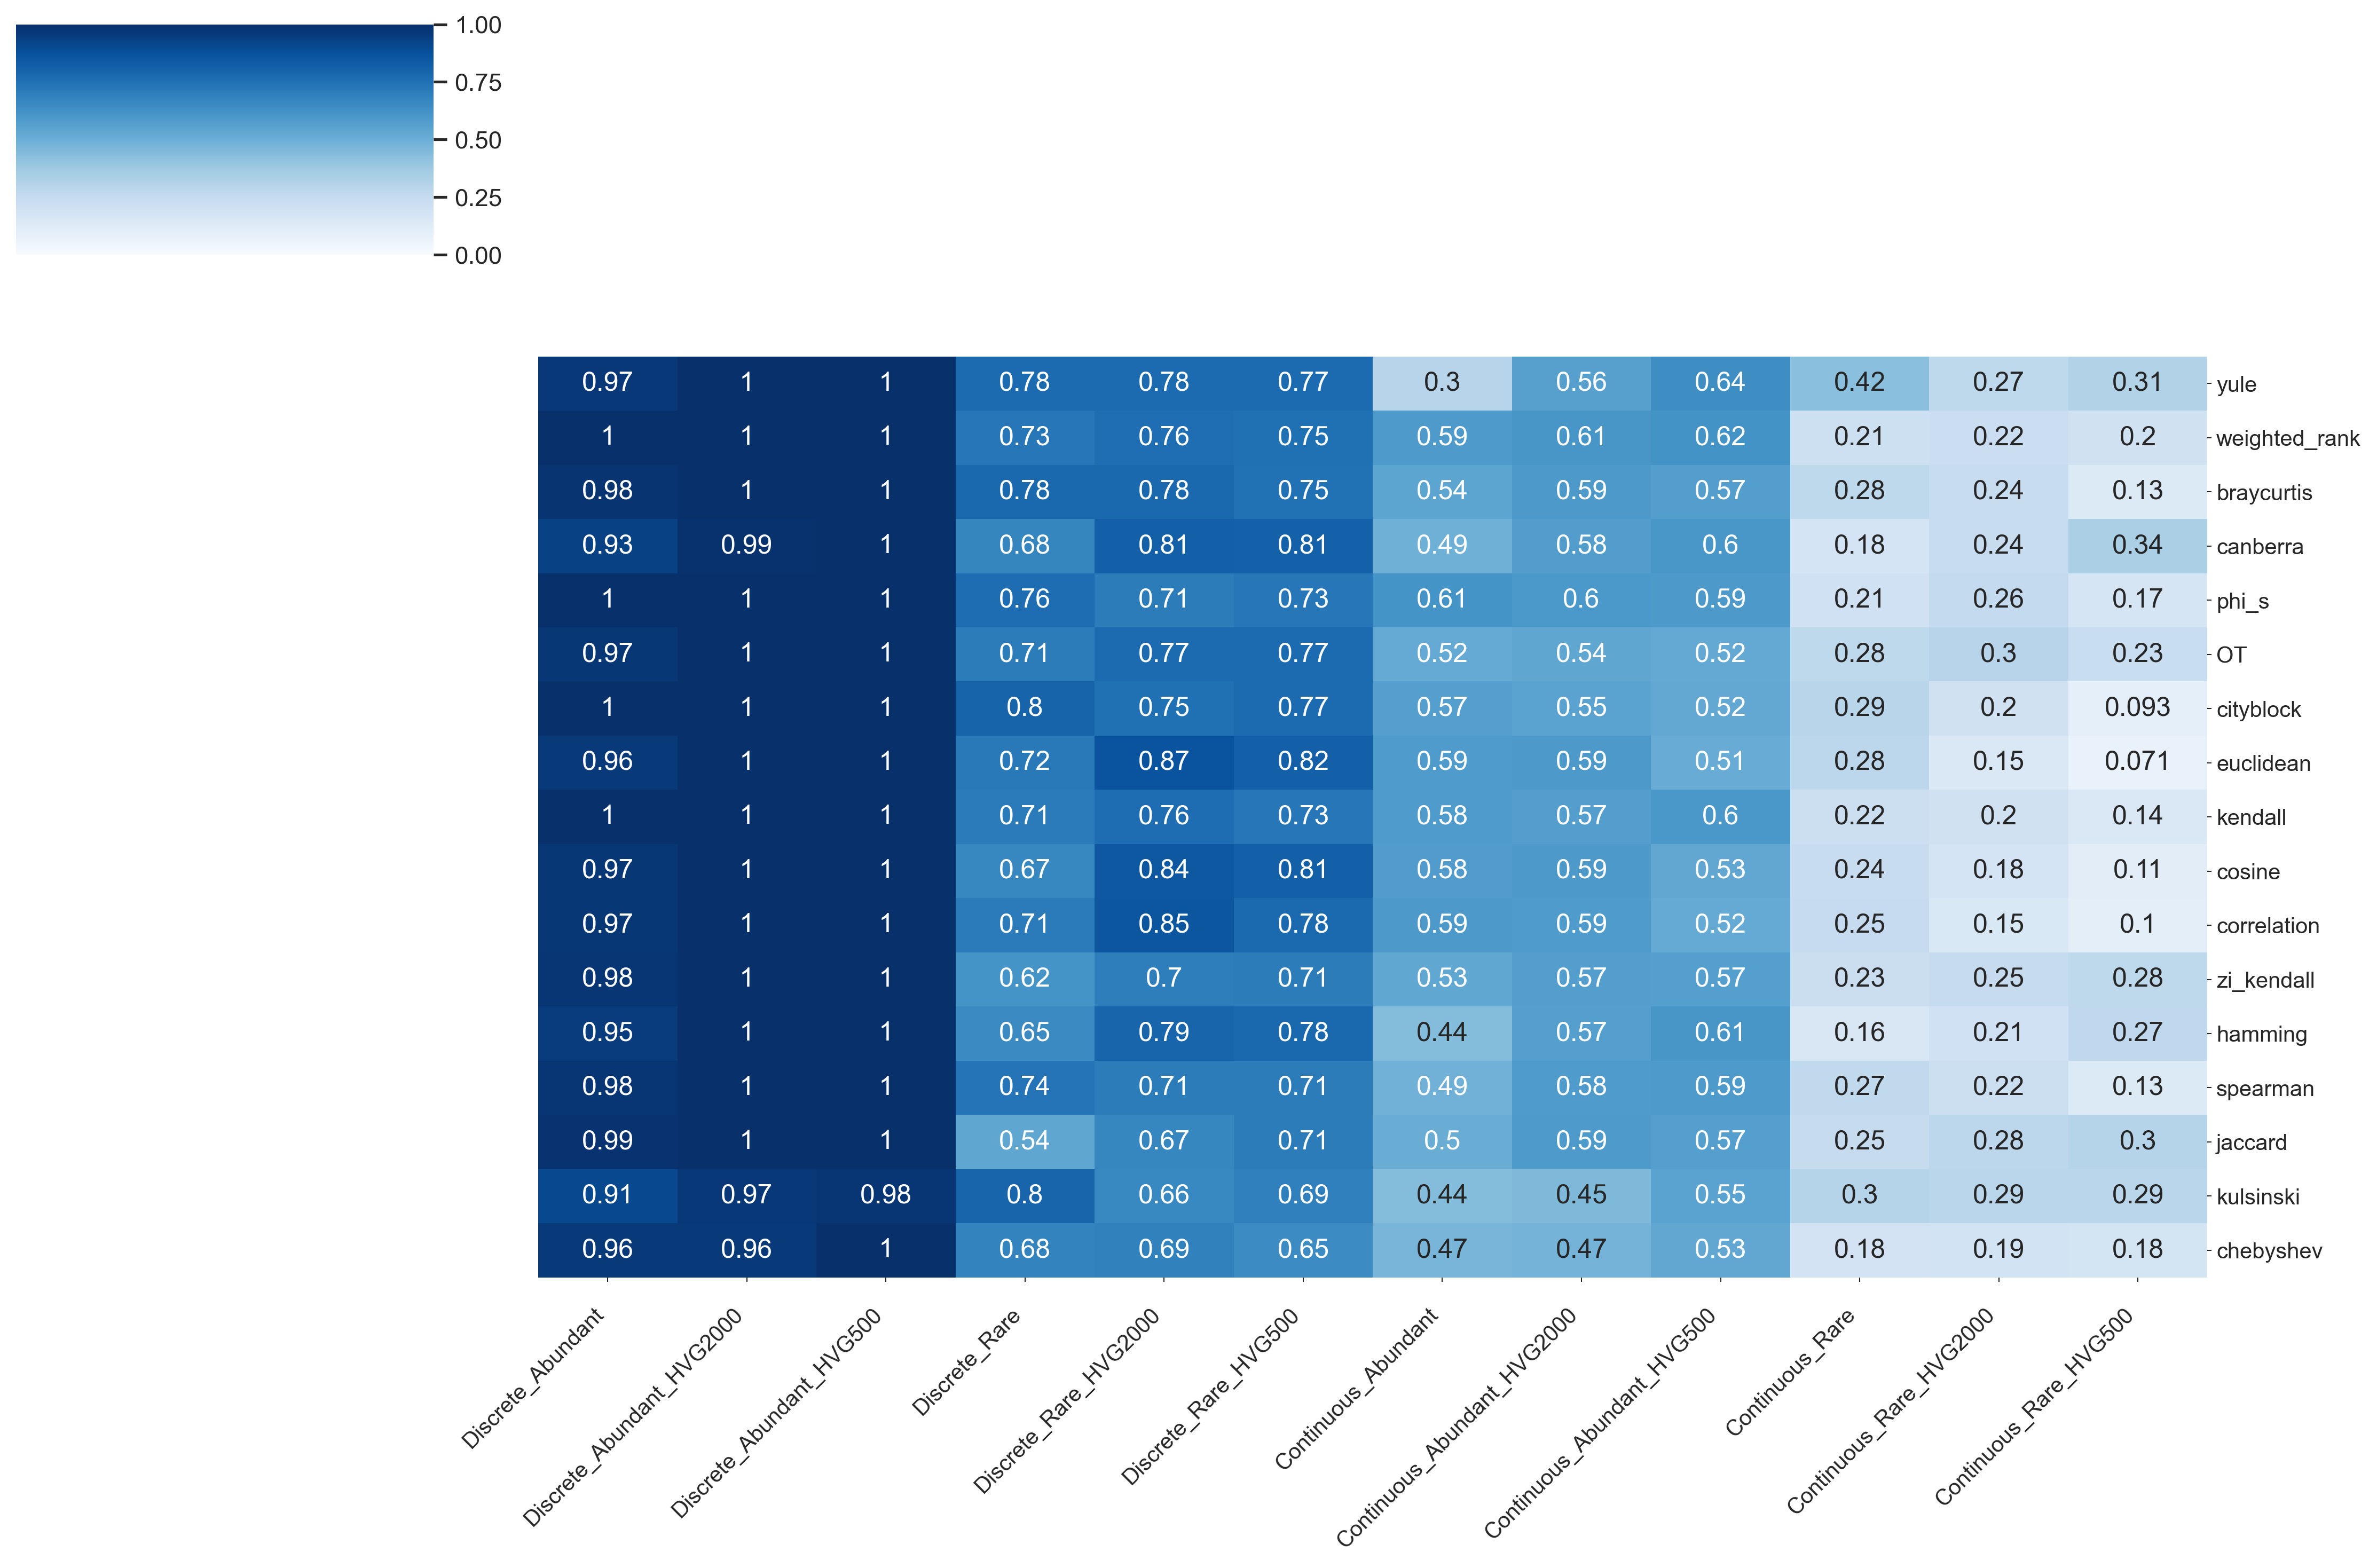

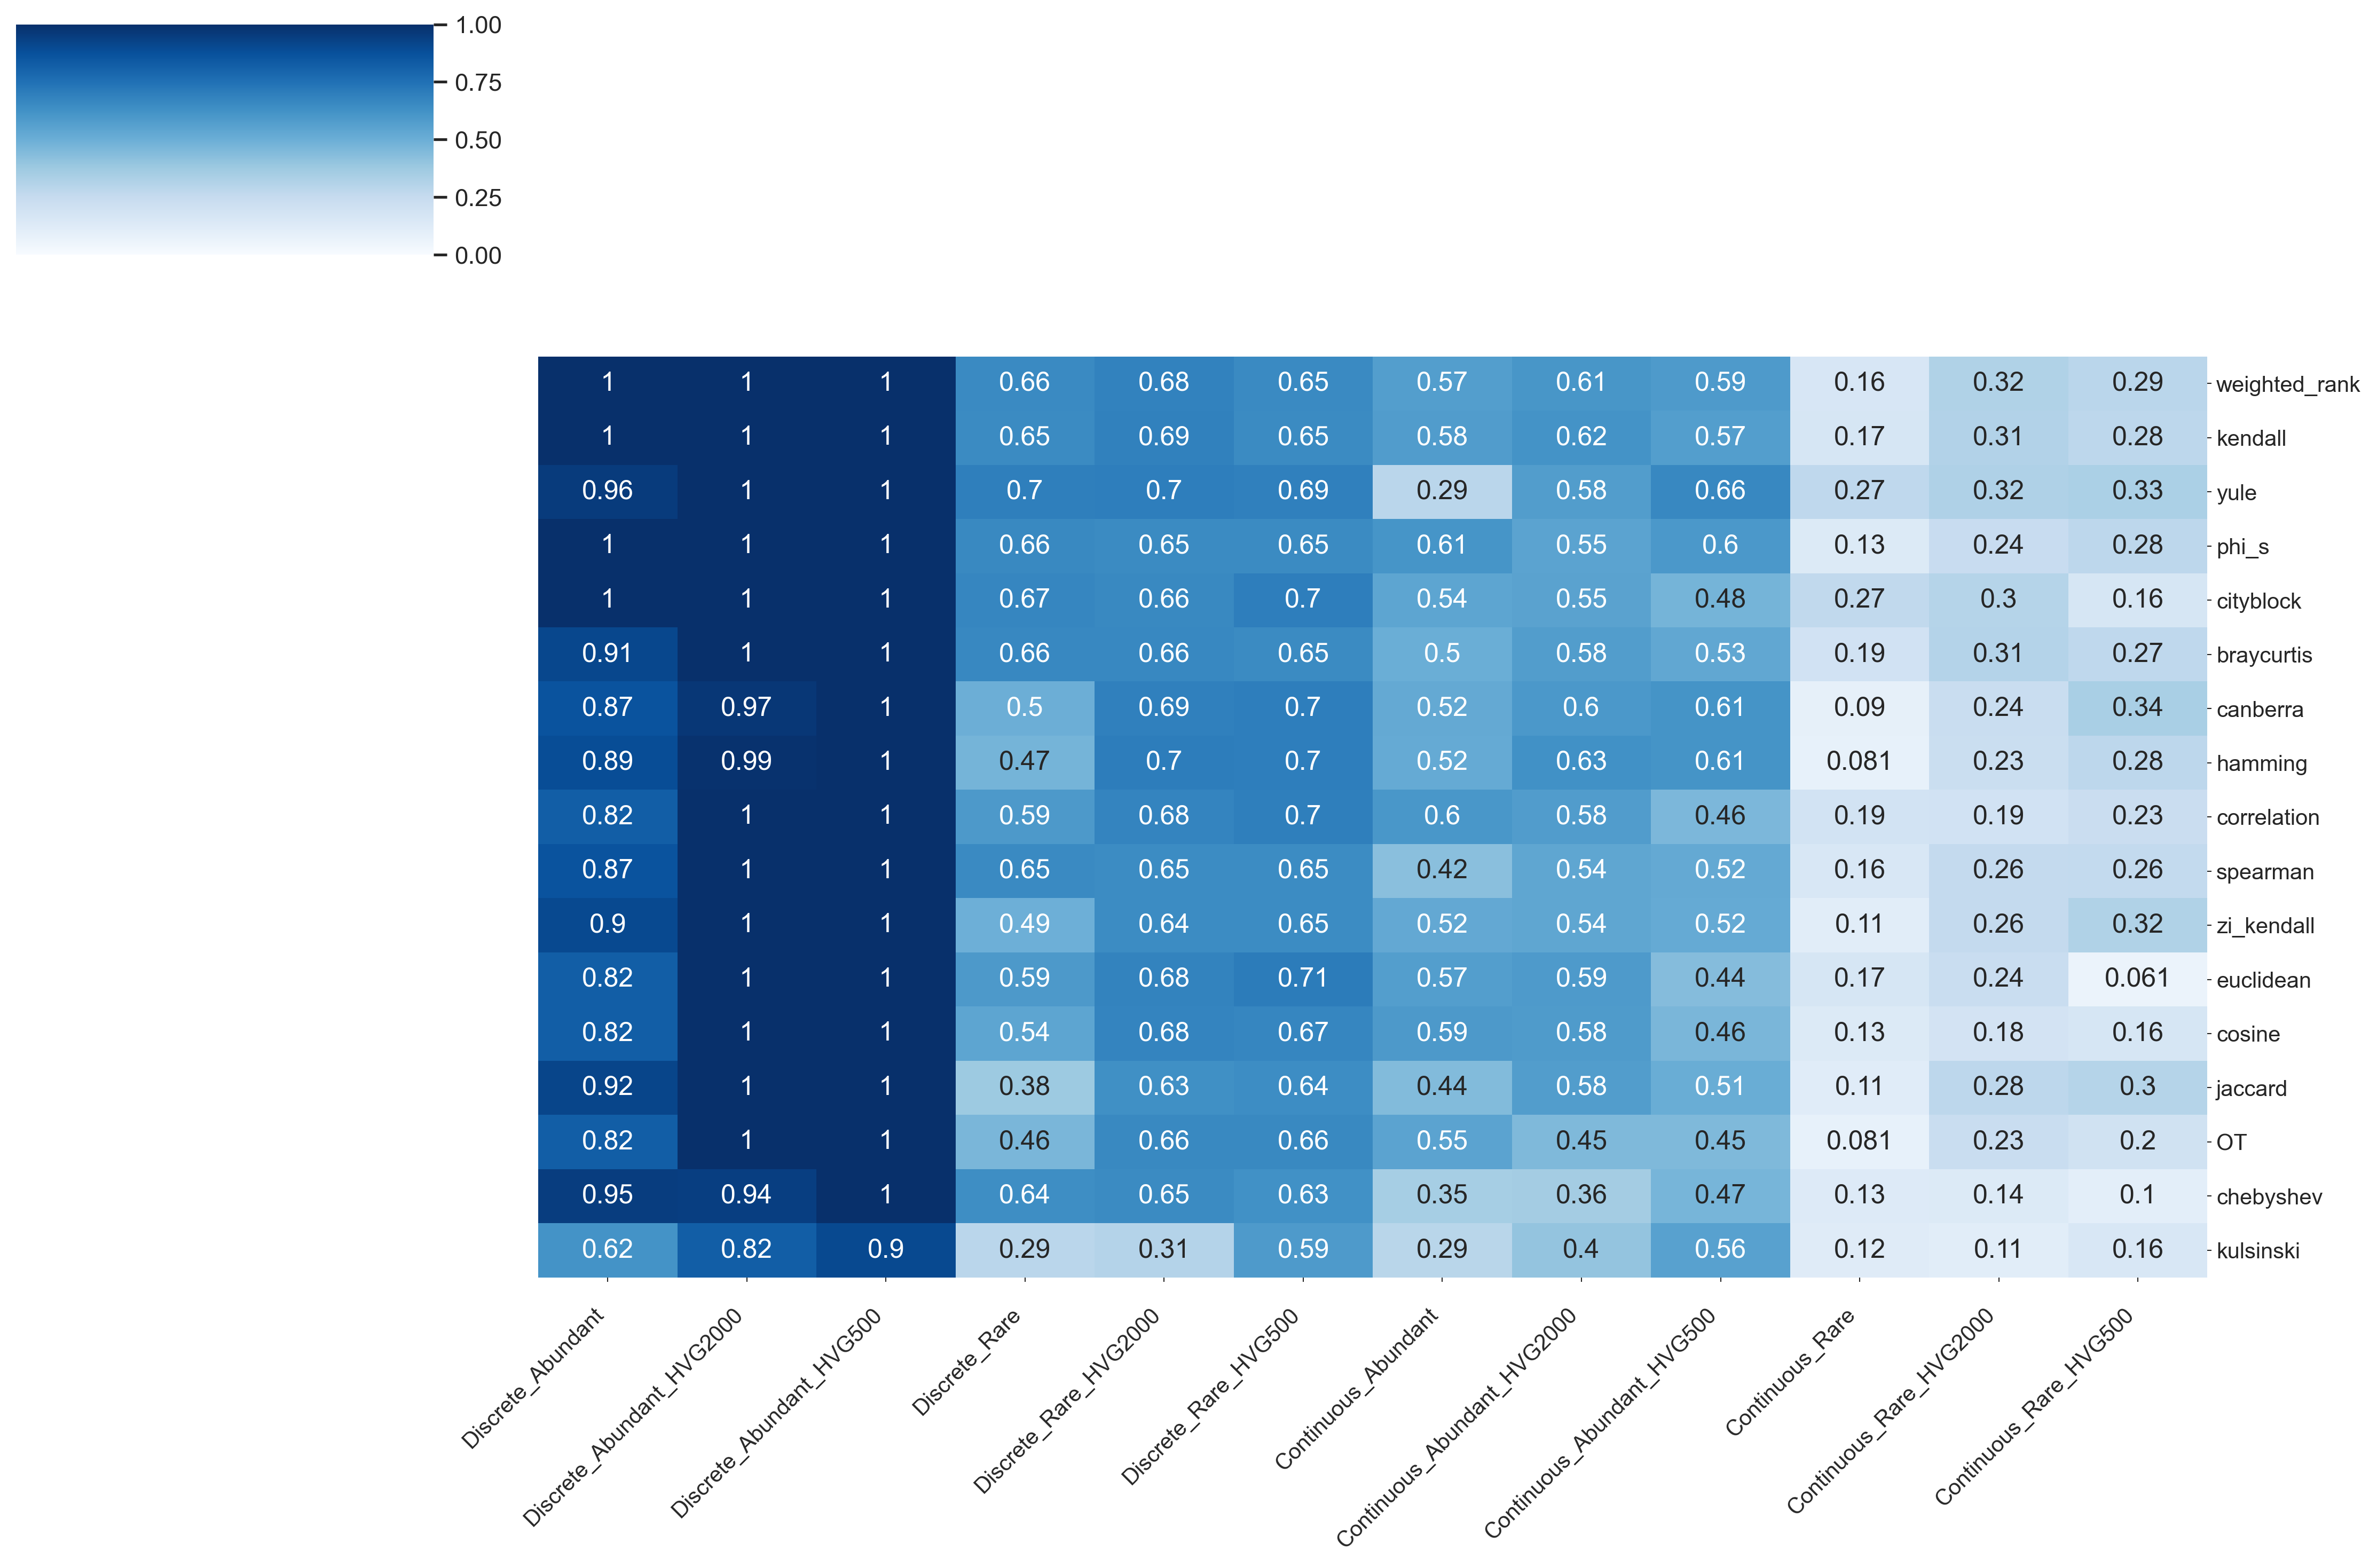

In [28]:
for score in eval_metrics:
    data = subset_k_df[subset_k_df['Evaluation_Metric']==score]
    mean_df = data.groupby(['Metric','Dataset'])['Performance'].describe()
    mean_df['ID'] = mean_df.index.map(lambda x: '_'.join([str(i) for i in x]))
    dat = mean_df.reset_index()
    dat = dat[['mean', 'ID']]

    data['ID'] = data['Metric'].str.cat(data[['Dataset']], sep='_')
    heat_df = data.merge(dat, how='inner', on='ID')
    heat_df = heat_df.drop(labels = ['Performance','k_value','Evaluation_Metric',
                                     'Population_Balance', 'Data_Structure', 'Condition', 'ID', 'Property'], axis = 1)
    heat_df = heat_df.drop_duplicates(keep='first').set_index('Metric')
    heat_df = heat_df.pivot(columns='Dataset', values='mean').reindex(columns=all_datasets)


    heat_df['metric_avg'] = np.mean(heat_df.values, axis=1)
    heat_df = heat_df.sort_values(by=['metric_avg'], ascending=False)
    heat_df['metric'] = heat_df.index

    heatmap = Heatmap(heat_df,chart_columns=all_datasets,
                      row_index='metric',
                      cmap=base_scale, 
                      vmin=0, vmax=1, 
                      annot = True,
                      cluster_rows=False, cluster_cols=False, 
                     config=heatmap_config)
    ax = heatmap.plot()
    ax.ax_heatmap.tick_params(axis='x', which='major', pad=10)
    if save is True:
        plt.savefig(f'{fig_dir}Heatmap_{score}.png',  bbox_inches = 'tight')
    plt.show()